In [37]:
import os 
import re
import ast
import anndata as ad 
import numpy as np 
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
sc.set_figure_params(dpi_save = 300)

In [17]:
adata = ad.read_h5ad('/sbgenomics/project-files/processed_MERFISH/HTAPP-514_centroids.h5ad')

In [18]:
control_markers = ['FTL', 'IGHG1', 'IGHG4', 'IGHM', 'IGKC', 'TMSB4X', 'LIPE', 'ALB']
markers_to_keep = [x for x in adata.var_names if x not in control_markers]

In [19]:
adata = adata[:,markers_to_keep]

In [20]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10)
sc.tl.umap(adata)

/opt/conda/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


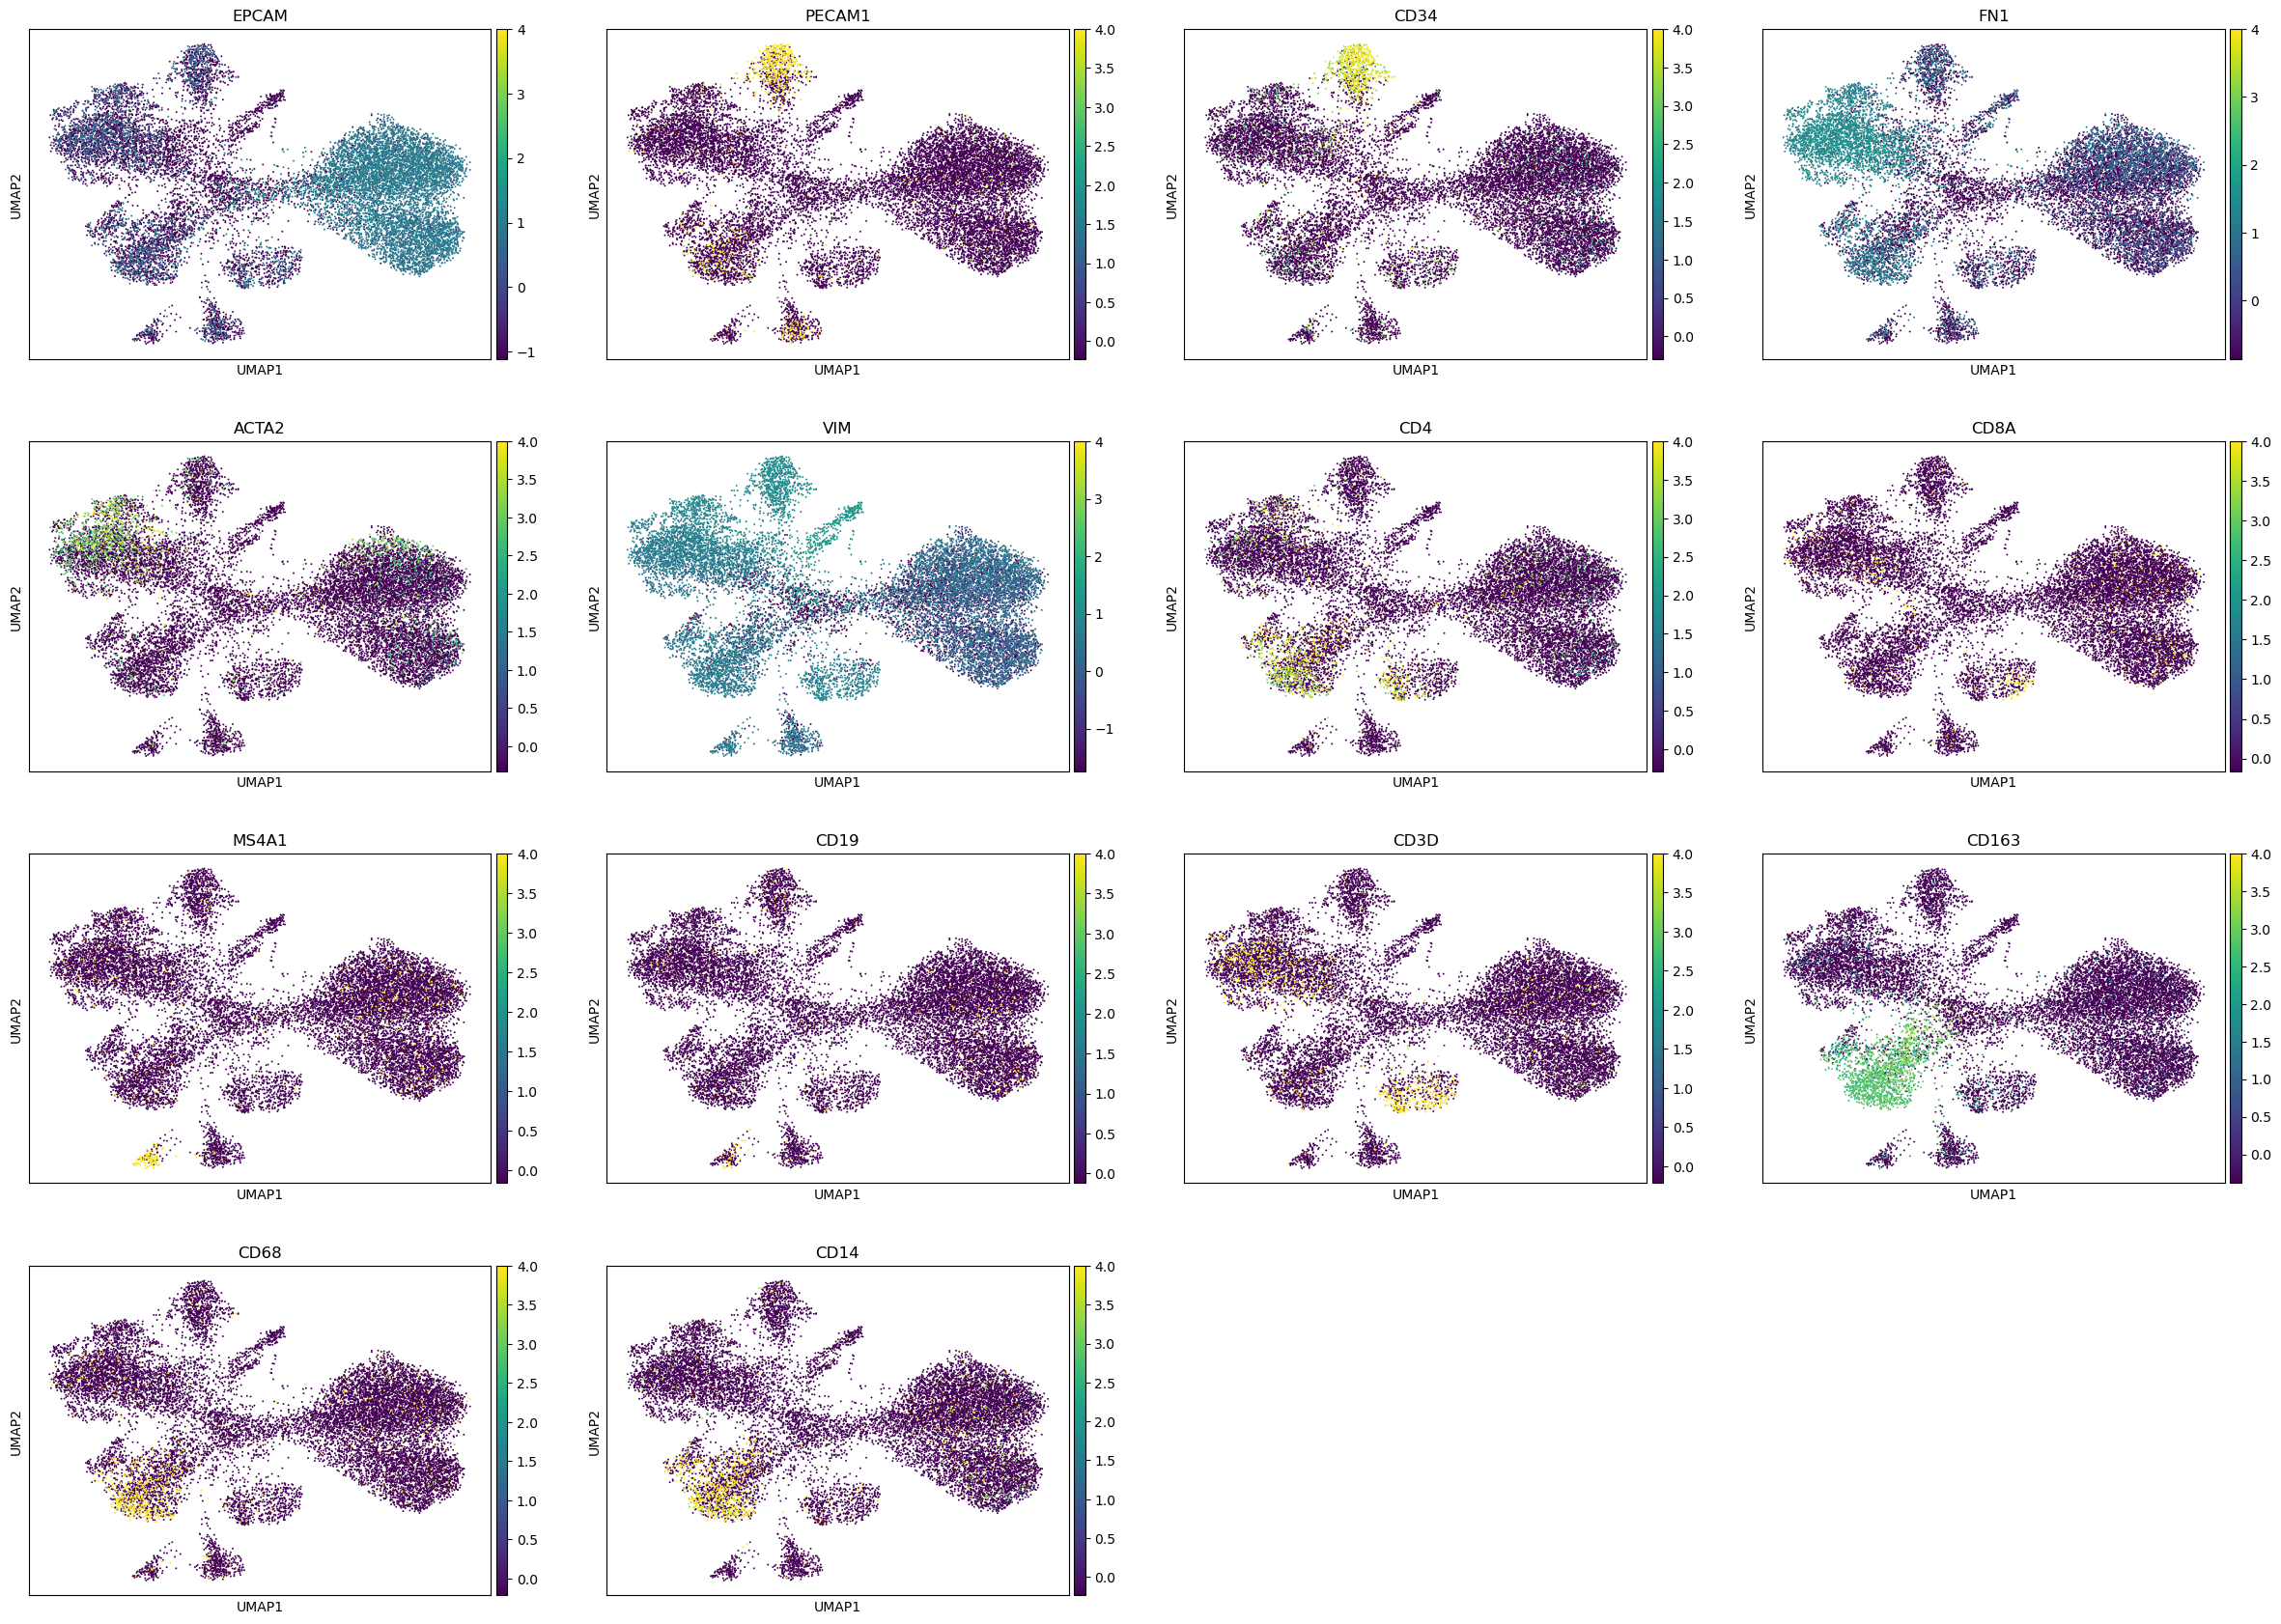

In [21]:
sc.pl.umap(adata, color=['EPCAM','PECAM1','CD34','FN1','ACTA2','VIM',
                         'CD4','CD8A','MS4A1','CD19','CD3D',
                         'CD163','CD68','CD14'],vmax=4)

In [23]:
sc.tl.leiden(adata)

/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


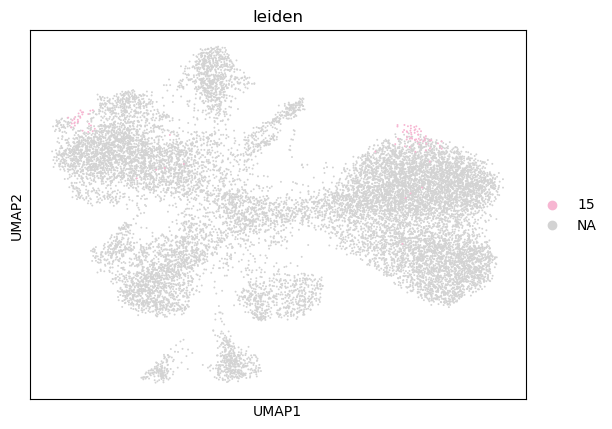

In [34]:
sc.pl.umap(adata, color = 'leiden', groups = '15')

In [26]:
adata.obs.leiden.dtype

CategoricalDtype(categories=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
                  '12', '13', '14', '15', '16', '17'],
, ordered=False, categories_dtype=object)

In [35]:
leiden_celltype_map = {

    '0' : 'MBC', 
    '1' : 'Fibroblast', 
    '2' : 'MBC', 
    '3' : 'MBC',
    '4' : 'Macrophage_Monocyte',
    '5' : 'Unknown',
    '6' : 'Endothelial',
    '7' : 'T',
    '8' : 'Unknown_stem',
    '9' : 'Uknown_vasculature',
    '10' : 'Activated Fibroblast',
    '11' : 'Macrophage_Monocyte',
    '12' : 'Fibroblast',
    '13' : 'MBC',
    '14' : 'B cell',
    '15' : 'MBC',
    '16' : 'Fibroblast',
    '17' : 'Fibroblast'
}

adata.obs['cell_type'] = adata.obs['leiden'].map(leiden_celltype_map)

/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/conda/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


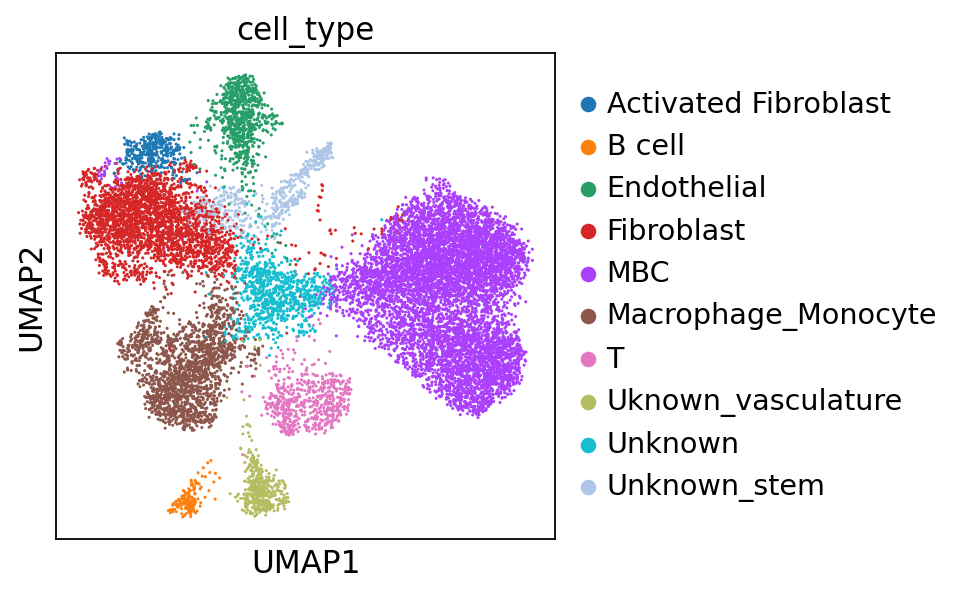

In [38]:
sc.pl.umap(adata, color = 'cell_type', save = '514_celltype_umap.png')

/opt/conda/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/opt/conda/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/opt/conda/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/opt/conda/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/opt/conda/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/opt/conda/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:422: 

categories: Activated Fibroblast, B cell, Endothelial, etc.
var_group_labels: MBC, B cell, Endothelial, etc.


/opt/conda/lib/python3.11/site-packages/scanpy/tools/_dendrogram.py:135: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = rep_df.groupby(level=0).mean()


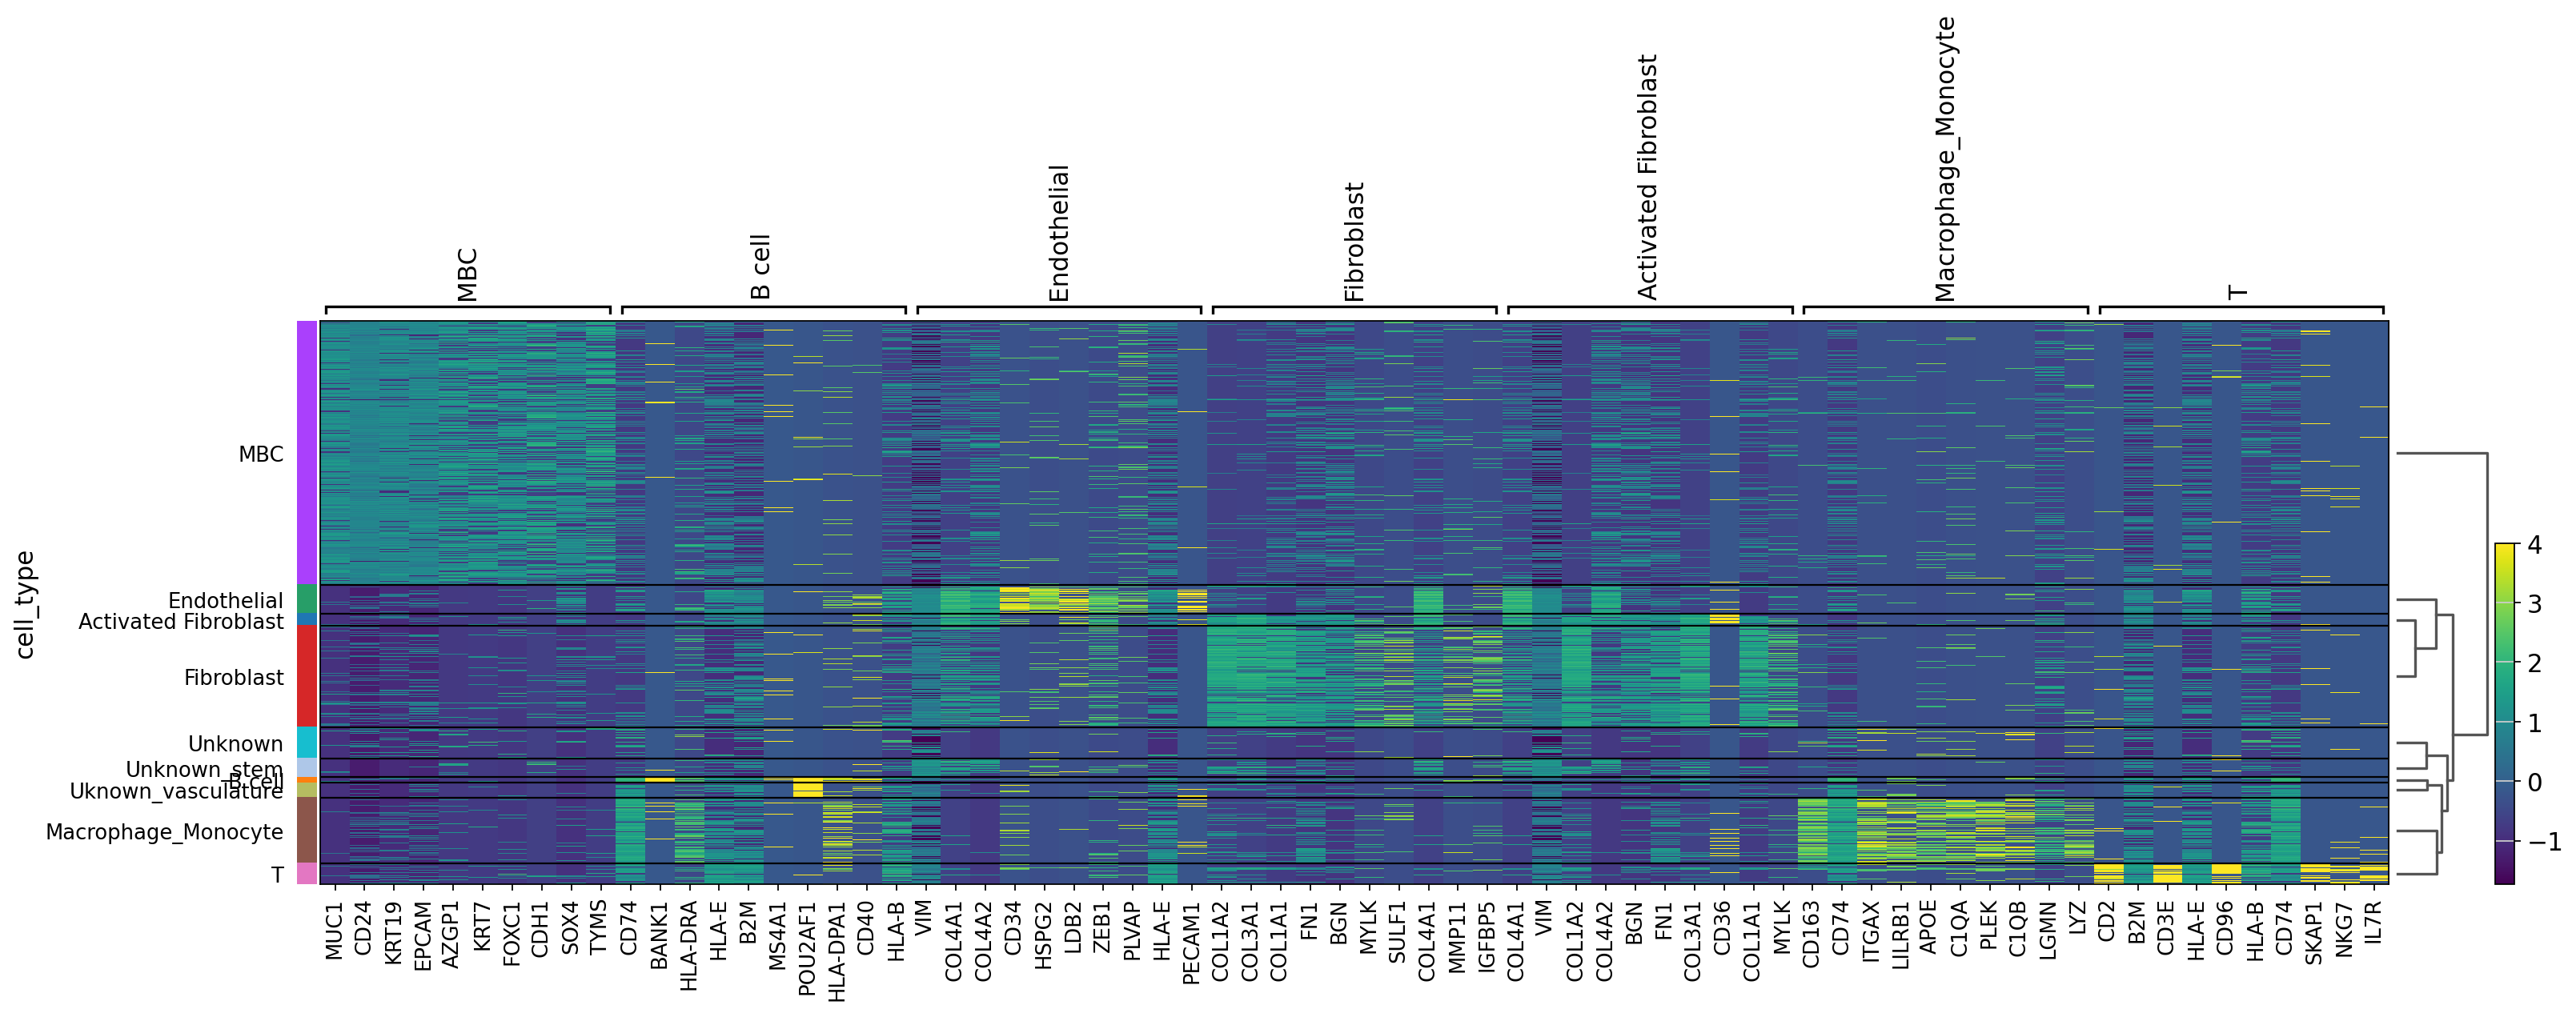

In [40]:
sc.tl.rank_genes_groups(adata, "cell_type", method="t-test")
sc.pl.rank_genes_groups_heatmap(adata, 
                                groups=['MBC','B cell','Endothelial','Fibroblast',
                                        'Activated Fibroblast','Macrophage_Monocyte','T'], 
                                n_genes=10, groupby="cell_type", show_gene_labels=True,vmax = 4,
                                save = '514_celltype_gene_heatmap.png')

In [41]:
adata.write_h5ad('/sbgenomics/output-files/HTAPP-514_centroids_celltyped.h5ad')